# Correlation analysis between signal data and wear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
%matplotlib inline


In [2]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## Calculate basic statistics for the c1 data set

In [3]:
def calculate_zero_crossings(signal):
    return ((np.diff(np.sign(signal)) != 0).sum())

In [4]:
def calculate_energy(signal):
    return np.sum(signal ** 2)

In [5]:
def calculate_statistics (file_path):
    df = pd.read_csv(file_path,sep=',')
    df.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']
    stats = pd.DataFrame()
    for column in df.columns:
        col_data = df[column]
        stats[column + "_min"] = [col_data.min()]
        stats[column + "_max"] = [col_data.max()]
        stats[column + "_mean"] = [col_data.mean()]
        stats[column + "_std"] = [col_data.std()]
        stats[column + "_skew"] = [skew(col_data)]
        stats[column + "_kurtosis"] = [kurtosis(col_data)]
        stats[column + "_energy"] = [calculate_energy(col_data)]
        stats[column + "_zero_crossings"] = [calculate_zero_crossings(col_data)]
    
    return stats 

In [6]:
folder_path = '../notebooks/data/raw/c1/c1/'

stats_list = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        stats_list.append(calculate_statistics(file_path))

c1_stats = pd.concat(stats_list, ignore_index=True)

In [7]:
c1_stats.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
0,-2.501,3.744,0.400855,0.842474,0.115213,-0.245204,1.108925e+05,3086,-12.051,10.724,...,789.008032,68617,-0.005,0.010,-0.000060,0.002230,0.823102,0.656831,0.633755,6164
1,-4.219,8.427,1.028156,1.864984,0.606318,0.022628,9.854836e+05,7897,-9.826,14.302,...,1678.728820,113549,-0.005,0.122,0.038556,0.012941,1.256874,4.876956,359.414825,18
2,-5.994,11.534,1.776100,2.672098,0.605039,0.073306,2.248208e+06,7446,-12.778,20.826,...,2129.286095,107435,-0.005,0.180,0.066571,0.019153,1.563446,5.272909,1047.931753,12
3,-6.157,11.788,2.104932,2.992563,0.586797,0.102543,2.928016e+06,7116,-13.915,24.148,...,2287.288788,106498,-0.005,0.234,0.080003,0.022859,1.785461,6.440646,1514.313067,14
4,-4.288,12.555,2.831399,2.979762,0.612709,0.016937,3.708553e+06,6409,-22.483,24.337,...,1860.090059,82803,-0.005,0.241,0.089197,0.024687,1.570881,5.279759,1880.101108,16


#### Test for missing data:

In [8]:
c1_stats.isnull().sum().sum

<bound method Series.sum of Force_X_min                   0
Force_X_max                   0
Force_X_mean                  0
Force_X_std                   0
Force_X_skew                  0
Force_X_kurtosis              0
Force_X_energy                0
Force_X_zero_crossings        0
Force_Y_min                   0
Force_Y_max                   0
Force_Y_mean                  0
Force_Y_std                   0
Force_Y_skew                  0
Force_Y_kurtosis              0
Force_Y_energy                0
Force_Y_zero_crossings        0
Force_Z_min                   0
Force_Z_max                   0
Force_Z_mean                  0
Force_Z_std                   0
Force_Z_skew                  0
Force_Z_kurtosis              0
Force_Z_energy                0
Force_Z_zero_crossings        0
Vibration_X_min               0
Vibration_X_max               0
Vibration_X_mean              0
Vibration_X_std               0
Vibration_X_skew              0
Vibration_X_kurtosis          0
Vibration_X_

#### Create a correlation matrix between each stats

In [9]:
c1_corr_matrix = c1_stats.corr()

In [10]:
c1_corr_matrix.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
Force_X_min,1.000000,-0.441763,0.185092,-0.730164,0.127208,0.369443,0.044385,-0.737540,0.670125,-0.681337,...,-0.656626,-0.150087,0.056409,-0.392565,-0.503369,-0.261515,0.403801,-0.433853,-0.515009,0.014691
Force_X_max,-0.441763,1.000000,0.798607,0.933397,-0.187434,-0.524530,0.854943,-0.017450,-0.729897,0.874063,...,0.932328,0.548172,-0.081971,0.369792,0.440833,0.265890,-0.210759,0.389195,0.417041,-0.047610
Force_X_mean,0.185092,0.798607,1.000000,0.534556,-0.140295,-0.333676,0.968666,-0.518561,-0.343179,0.494728,...,0.579023,0.493808,-0.048883,0.141378,0.142122,0.109412,0.044519,0.136749,0.106891,-0.044857
Force_X_std,-0.730164,0.933397,0.534556,1.000000,-0.196503,-0.535403,0.638499,0.264047,-0.811251,0.922789,...,0.967970,0.485750,-0.083520,0.447459,0.545012,0.305658,-0.330513,0.470787,0.532177,-0.037502
Force_X_skew,0.127208,-0.187434,-0.140295,-0.196503,1.000000,0.808597,-0.151810,-0.188526,0.162968,-0.278938,...,-0.207596,-0.068737,-0.059194,0.026192,-0.062615,0.021761,0.022221,0.072661,-0.024590,0.034412


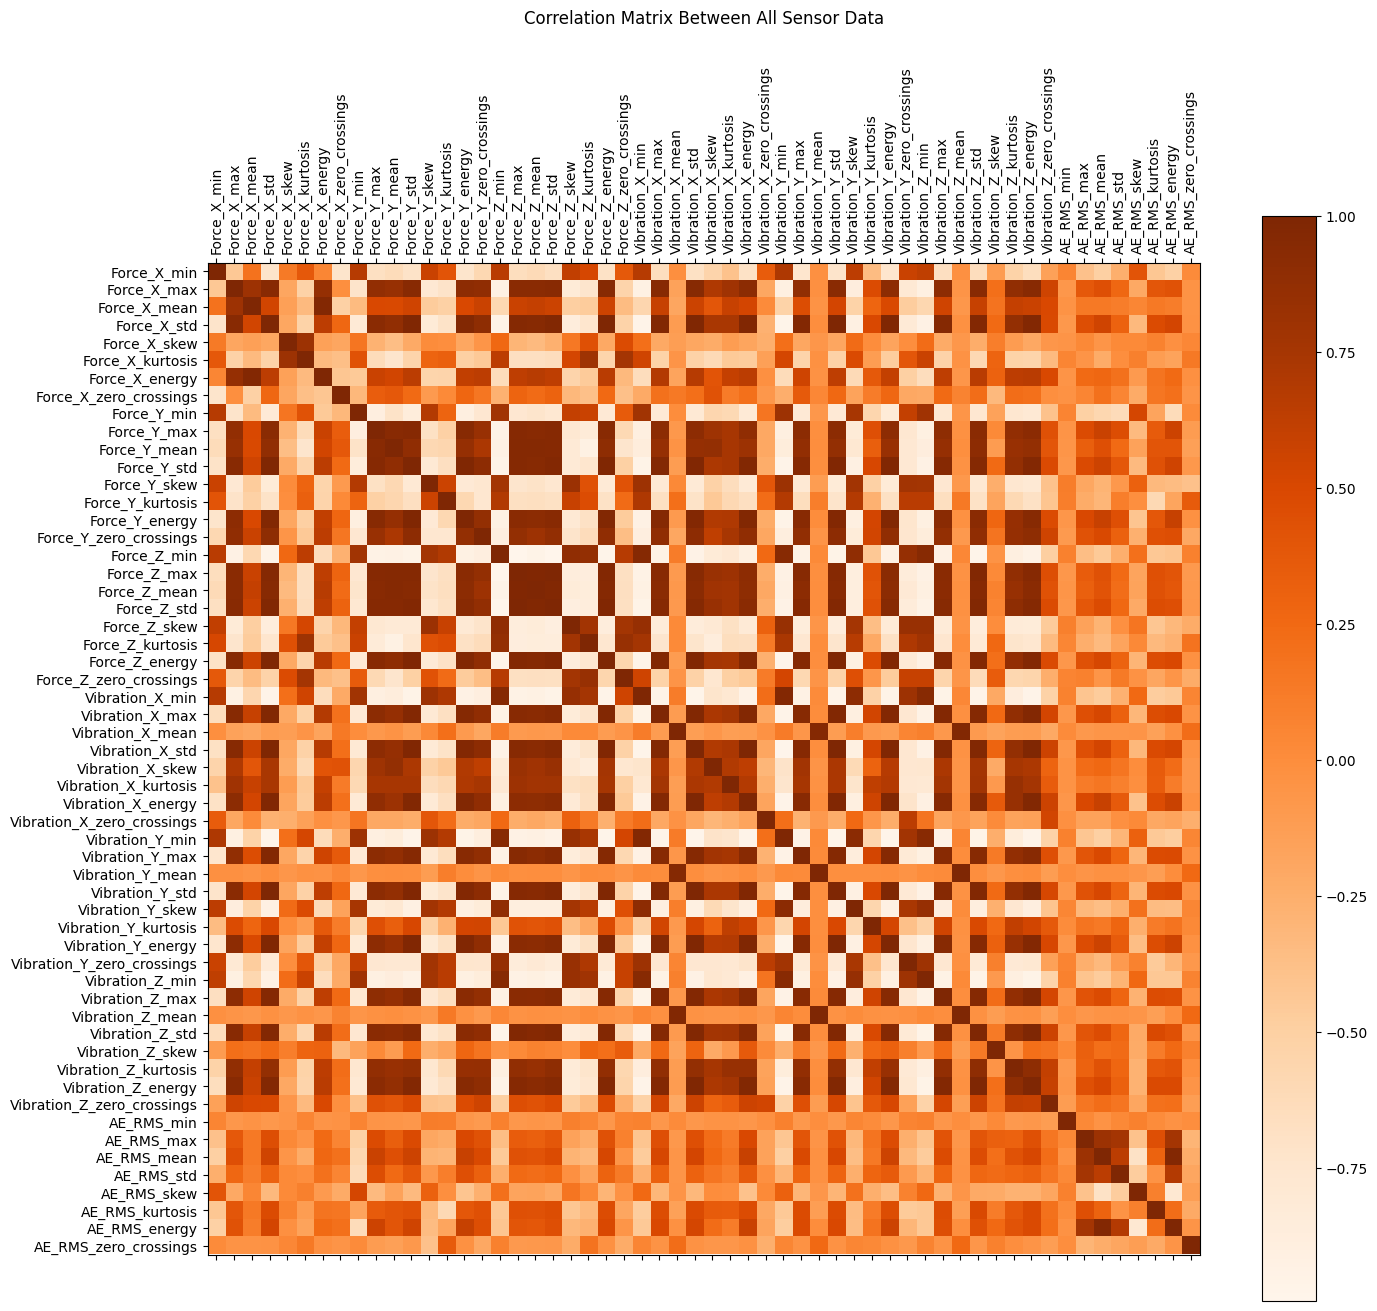

In [11]:
plt.figure(figsize=(16,14))
plt.matshow(c1_corr_matrix, fignum=1, cmap='Oranges')
plt.colorbar()
plt.xticks(range(len(c1_corr_matrix.columns)), c1_corr_matrix.columns, rotation=90)
plt.yticks(range(len(c1_corr_matrix.columns)), c1_corr_matrix.columns)
plt.title('Correlation Matrix Between All Sensor Data', pad=30)
plt.show()


## Load wear data

In [12]:
c1_wear_data = pd.read_csv('../notebooks/data/raw/c1/c1_wear.csv', sep=',')

In [13]:
c1_wear_data.head()

,cut,flute_1,flute_2,flute_3
0,1,32.317114,48.892617,37.720825
1,2,37.914879,49.570815,37.720825
2,3,43.087910,50.302867,37.720825
3,4,47.859072,51.083652,37.849851
4,5,52.250329,51.908288,38.172665


In [14]:
c1_wear_data = c1_wear_data.drop(columns=['cut'])

## Correlations between calculated statistics and wear data

In [33]:
c1_combined_data = pd.concat([c1_stats, c1_wear_data], axis=1)
c1_combined_corr_matrix = c1_combined_data.corr()

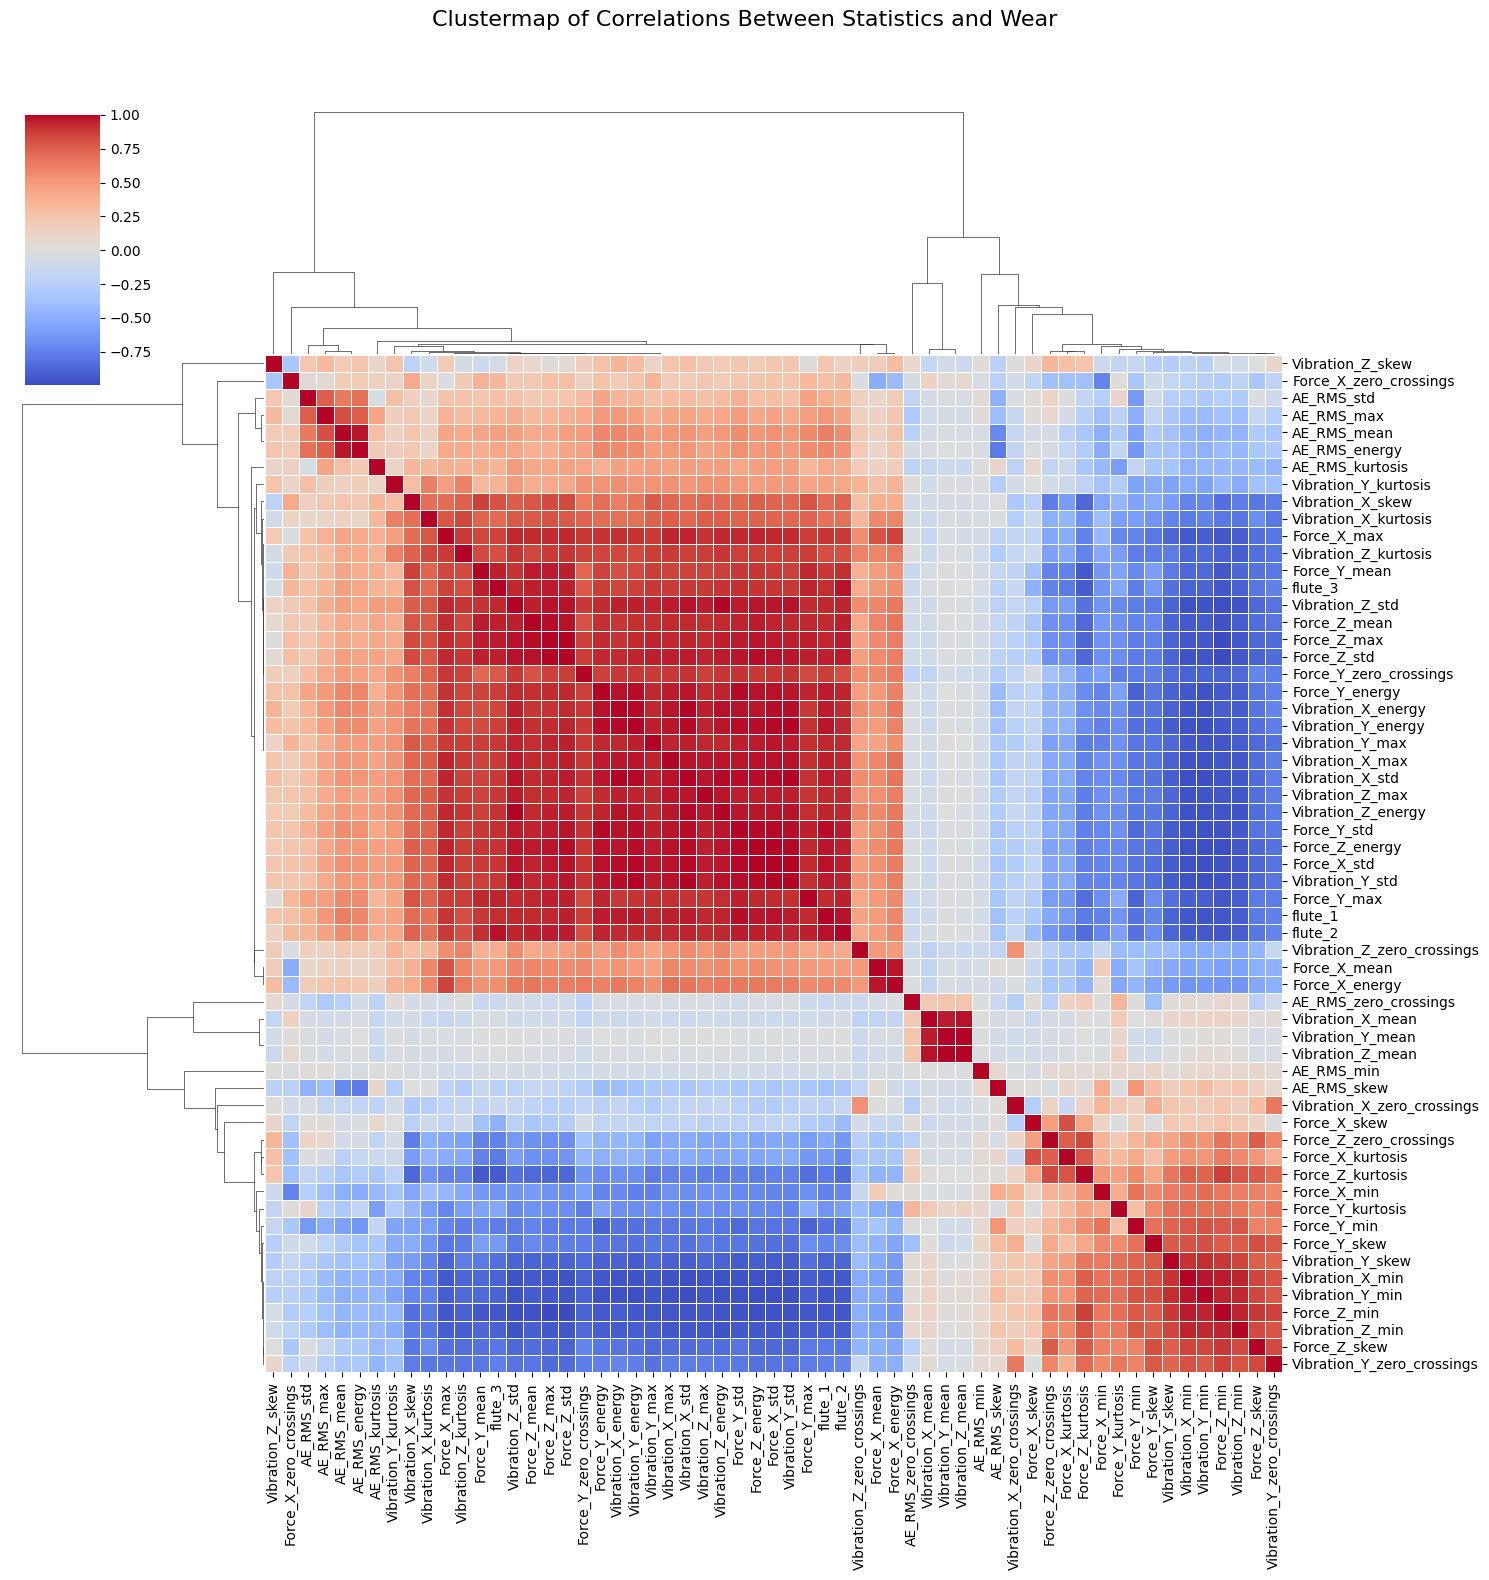

In [34]:
clustermap = sns.clustermap(c1_combined_corr_matrix, metric='correlation', method='average', cmap='coolwarm', linewidths=0.5, figsize=(15, 15))
clustermap.figure.suptitle('Clustermap of Correlations Between Statistics and Wear', y=1.05, fontsize=16)
plt.show()

In [35]:
c1_wear_corr_matrix = c1_combined_corr_matrix[['flute_1', 'flute_2', 'flute_3']].drop(['flute_1', 'flute_2', 'flute_3'], axis=0)

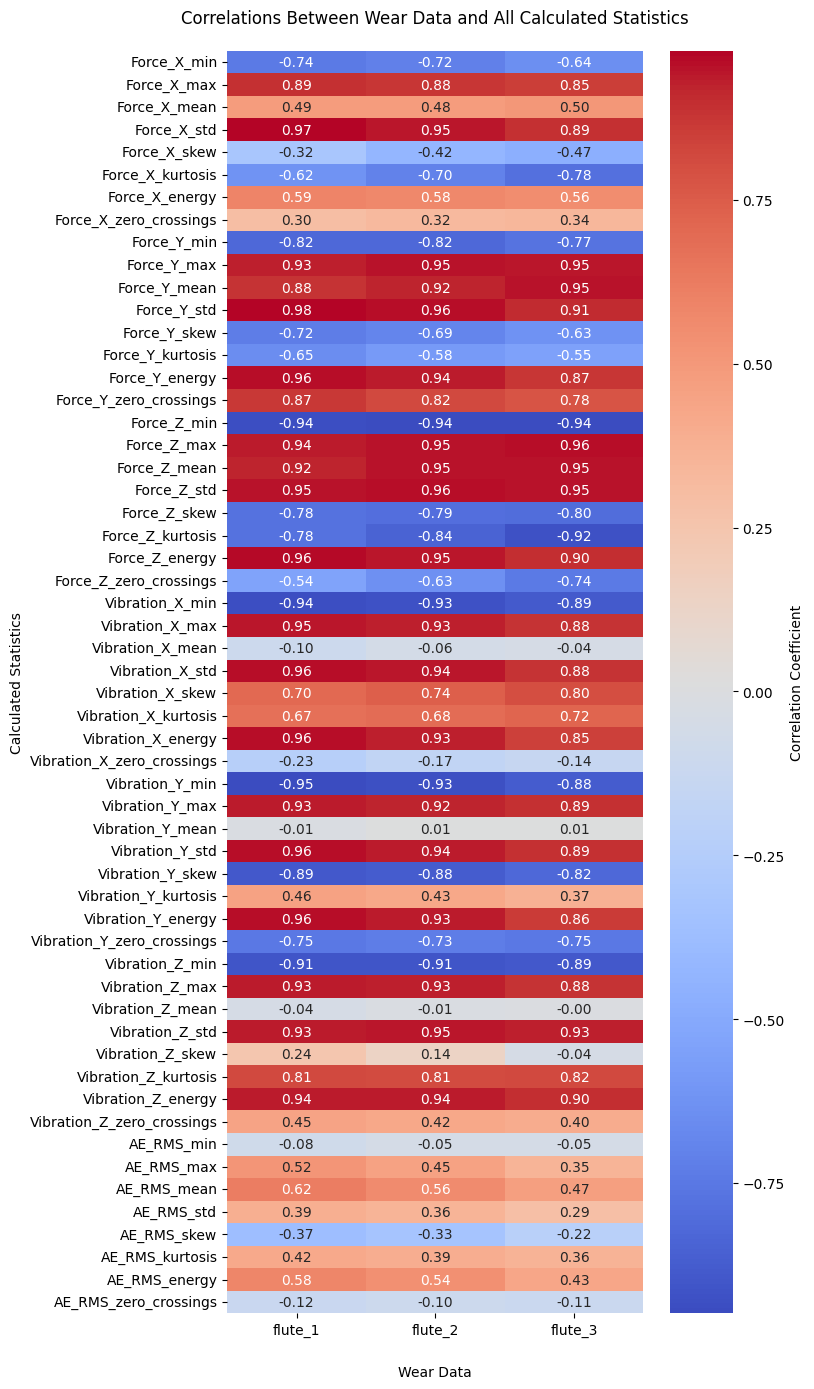

In [36]:

plt.figure(figsize=(8, 14))
sns.heatmap(c1_wear_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlations Between Wear Data and All Calculated Statistics', pad=20)
plt.ylabel('Calculated Statistics')
plt.xlabel('Wear Data', labelpad=20)
plt.tight_layout()
plt.show()


In [17]:
min_columns = [
    'Force_X_min', 
    'Force_Y_min', 
    'Force_Z_min', 
    'Vibration_X_min', 
    'Vibration_Y_min', 
    'Vibration_Z_min', 
    'AE_RMS_min'
]
min_stats = c1_stats[min_columns]
combined_data_min = pd.concat([min_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_min = combined_data_min.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
min_correlation_matrix = corr_matrix_min.loc[min_columns, wear_columns]


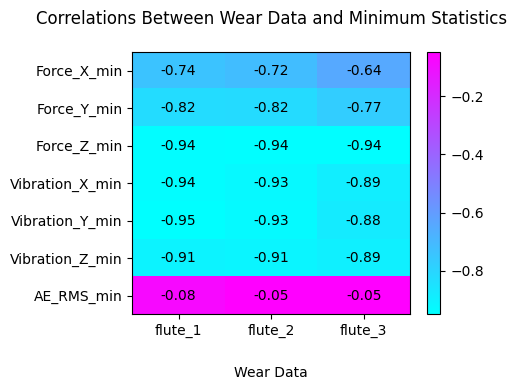

In [37]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Minimum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(min_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(min_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(min_columns)), min_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()


In [19]:
max_columns = [
    'Force_X_max', 
    'Force_Y_max', 
    'Force_Z_max', 
    'Vibration_X_max', 
    'Vibration_Y_max', 
    'Vibration_Z_max', 
    'AE_RMS_max'
]
max_stats = c1_stats[max_columns]
combined_data_max = pd.concat([max_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_max = combined_data_max.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
max_correlation_matrix = corr_matrix_max.loc[max_columns, wear_columns]


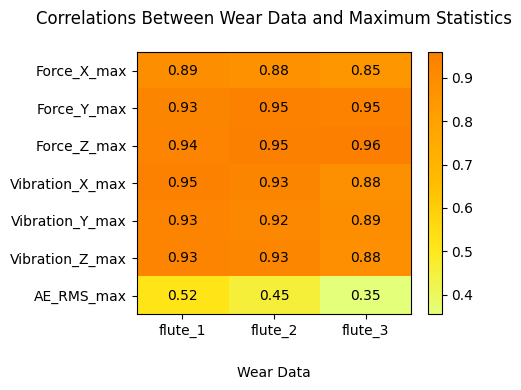

In [38]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Maximum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(max_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(max_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(max_columns)), max_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [21]:
mean_columns = [
    'Force_X_mean', 
    'Force_Y_mean', 
    'Force_Z_mean', 
    'Vibration_X_mean', 
    'Vibration_Y_mean', 
    'Vibration_Z_mean', 
    'AE_RMS_mean'
]
mean_stats = c1_stats[mean_columns]
combined_data_mean = pd.concat([mean_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_mean = combined_data_mean.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
mean_correlation_matrix = corr_matrix_mean.loc[mean_columns, wear_columns]


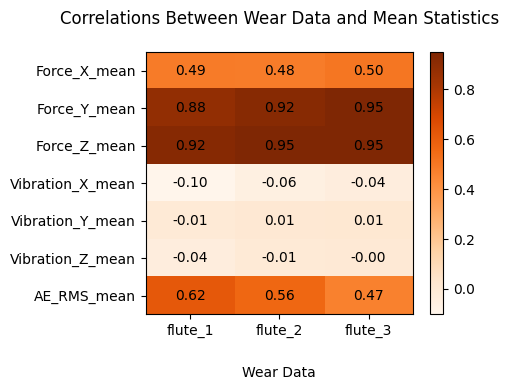

In [39]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Mean Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(mean_correlation_matrix, cmap='Oranges', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(mean_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(mean_columns)), mean_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [23]:
std_columns = [
    'Force_X_std', 
    'Force_Y_std', 
    'Force_Z_std', 
    'Vibration_X_std', 
    'Vibration_Y_std', 
    'Vibration_Z_std', 
    'AE_RMS_std'
]
std_stats = c1_stats[std_columns]
combined_data_std = pd.concat([std_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_std = combined_data_std.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
std_correlation_matrix = corr_matrix_std.loc[std_columns, wear_columns]


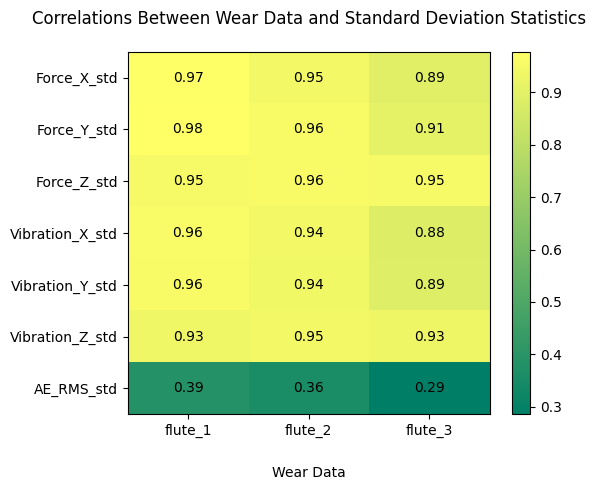

In [40]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Standard Deviation Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(std_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(std_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(std_columns)), std_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [25]:
skew_columns = [
    'Force_X_skew', 
    'Force_Y_skew', 
    'Force_Z_skew', 
    'Vibration_X_skew', 
    'Vibration_Y_skew', 
    'Vibration_Z_skew', 
    'AE_RMS_skew'
]
skew_stats = c1_stats[skew_columns]
combined_data_skew = pd.concat([skew_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_skew = combined_data_skew.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
skew_correlation_matrix = corr_matrix_skew.loc[skew_columns, wear_columns]


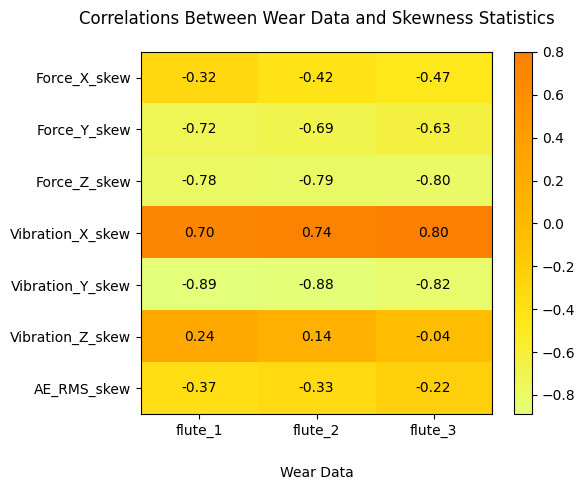

In [41]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Skewness Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(skew_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(skew_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(skew_columns)), skew_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [27]:
kurtosis_columns = [
    'Force_X_kurtosis', 
    'Force_Y_kurtosis', 
    'Force_Z_kurtosis', 
    'Vibration_X_kurtosis', 
    'Vibration_Y_kurtosis', 
    'Vibration_Z_kurtosis', 
    'AE_RMS_kurtosis'
]
kurtosis_stats = c1_stats[kurtosis_columns]
combined_data_kurtosis = pd.concat([kurtosis_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_kurtosis = combined_data_kurtosis.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
kurtosis_correlation_matrix = corr_matrix_kurtosis.loc[kurtosis_columns, wear_columns]


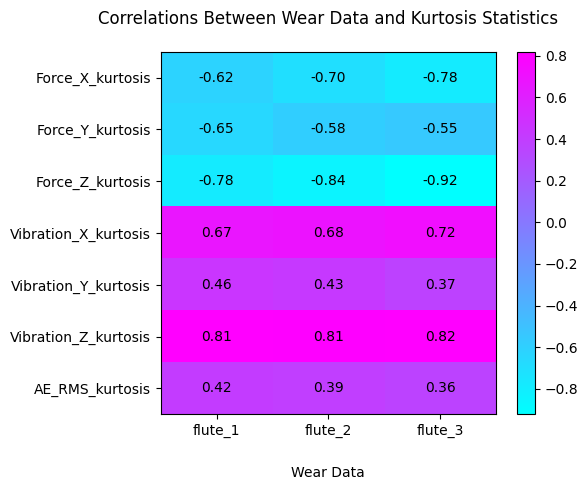

In [42]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Kurtosis Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(kurtosis_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(kurtosis_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(kurtosis_columns)), kurtosis_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [29]:
zero_cross_columns = [
    'Force_X_zero_crossings', 
    'Force_Y_zero_crossings', 
    'Force_Z_zero_crossings', 
    'Vibration_X_zero_crossings', 
    'Vibration_Y_zero_crossings', 
    'Vibration_Z_zero_crossings', 
    'AE_RMS_zero_crossings'
]

zero_cross_stats = c1_stats[zero_cross_columns]
combined_data_zero_cross = pd.concat([zero_cross_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_zero_cross = combined_data_zero_cross.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
zero_cross_correlation_matrix = corr_matrix_zero_cross.loc[zero_cross_columns, wear_columns]



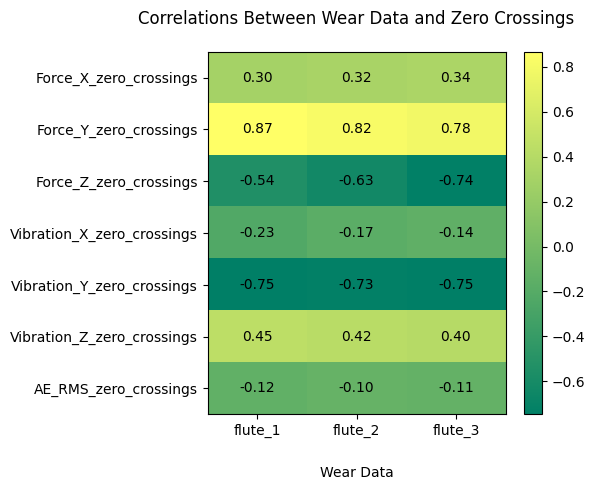

In [43]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Zero Crossings',  pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(zero_cross_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(zero_cross_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(zero_cross_columns)), zero_cross_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [31]:
energy_columns = [
    'Force_X_energy', 
    'Force_Y_energy', 
    'Force_Z_energy', 
    'Vibration_X_energy', 
    'Vibration_Y_energy', 
    'Vibration_Z_energy', 
    'AE_RMS_energy'
]

energy_stats = c1_stats[energy_columns]
combined_data_energy = pd.concat([energy_stats.reset_index(drop=True), c1_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_energy= combined_data_energy.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
energy_correlation_matrix = corr_matrix_energy.loc[energy_columns, wear_columns]

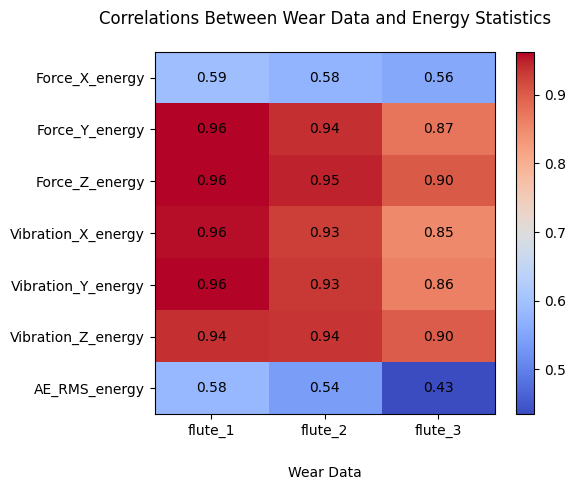

In [44]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Energy Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(energy_correlation_matrix, cmap='coolwarm', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(energy_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(energy_columns)), energy_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()